Part 2

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [202]:
# Load dataset
df = pd.read_csv("CLEANED_DATASET_3.csv")  # Update with the correct path if needed

# Check for missing values
print(df.isnull().sum())

# Display dataset information
print(df.info())

# Summary statistics
print(df.describe())

print("Columns in df:")
print(df.columns.tolist())


id                        0
name                      0
description               0
host_id                   0
host_since                0
                         ..
property_type_Tower       0
room_type_Hotel room      0
room_type_Private room    0
room_type_Shared room     0
log_price                 0
Length: 144, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61365 entries, 0 to 61364
Columns: 144 entries, id to log_price
dtypes: bool(119), float64(14), int64(4), object(7)
memory usage: 18.7+ MB
None
                 id       host_id  host_response_rate  host_acceptance_rate   
count  6.136500e+04  6.136500e+04        61365.000000          61365.000000  \
mean   6.516899e+17  2.150232e+08            0.934776              0.838705   
std    4.630102e+17  1.992071e+08            0.189790              0.260523   
min    1.391300e+04  2.594000e+03            0.000000              0.000000   
25%    4.627078e+07  3.025318e+07            0.990000              0.800000  

In [198]:
print("Columns in df:")
print(df.columns.tolist())


Columns in df:
['id', 'name', 'description', 'host_id', 'host_since', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'calculated_host_listings_count', 'neighbourhood_original', 'property_type_original', 'room_type_original', 'neighbourhood_Barnet', 'neighbourhood_Bexley', 'neighbourhood_Brent', 'neighbourhood_Bromley', 'neighbourhood_Camden', 'neighbourhood_City of London', 'neighbourhood_Croydon', 'neighbourhood_Ealing', 'neighbourhood_Enfield', 'neighbourhood_Greenwich', 'neighbourhood_Hackney', 'neighbourhood_Hammersmith and Fulham', 'neighbourhood_Haringey', 'neighbourhood_Harrow', 'neighbourhood_Havering', 'neighbourhood_Hillingdon', 'neighbourhood_Hounslow', 'neighbourhood_Islington', 'neighbourhood_Kensington and Chelsea', 'neighbourhood_Kingston upon Thames'

In [175]:
# Drop irrelevant columns
drop_columns = [
    'id', 'name', 'description', 'host_id', 'host_since', 
    'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
    'host_listings_count', 'host_total_listings_count'
]

df_cleaned = df.drop(columns=drop_columns)

# Display updated dataframe info
print(df_cleaned.info())

# Show first few rows
df_cleaned.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61365 entries, 0 to 61364
Columns: 134 entries, accommodates to log_price
dtypes: bool(119), float64(8), int64(3), object(4)
memory usage: 14.0+ MB
None


,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,...,property_type_Shared room in villa,property_type_Shepherd’s hut,property_type_Shipping container,property_type_Tent,property_type_Tiny home,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room,log_price
0,-1.181587,-1.379071,0.508735,0.990629,"[""Kitchen"", ""Refrigerator"", ""Microwave"", ""Free...",200.0,1,1125,-0.443165,-1.746612,...,False,False,False,False,False,False,False,False,True,5.298317
1,-1.181587,-0.573563,-0.556308,-0.449959,Unknown,675.0,1,365,-0.443165,-1.746612,...,False,False,False,False,False,False,False,True,False,6.514713
2,-0.685646,-0.573563,-0.556308,-0.449959,"[""Washer"", ""Wifi"", ""Kitchen""]",95.0,1,365,-0.443165,-1.746612,...,False,False,False,False,False,False,False,True,False,4.553877
3,-0.685646,-0.573563,-0.556308,-1.170253,"[""Microwave"", ""Hot water kettle"", ""Body soap"",...",166.0,7,365,0.011580,0.619047,...,False,False,False,False,False,False,False,False,False,5.111988
4,-0.685646,-0.573563,-0.556308,-0.449959,"[""Cleaning products"", ""Cooking basics"", ""First...",105.0,2,60,0.428430,0.648434,...,False,False,False,False,False,False,False,False,False,4.653960


In [176]:
# Identify all neighbourhood columns (one-hot encoded)
neighbourhood_columns = [col for col in df_cleaned.columns if col.startswith('neighbourhood_')]

# Select relevant columns for clustering
selected_features = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds',  # Property characteristics
    'log_price',  # Price-related
    'review_scores_rating',  # Guest experience
    'room_type_Private room', 'room_type_Shared room'  # Room type
] + neighbourhood_columns  # Add all neighbourhood features

# Create a new DataFrame with only the selected features
df_selected = df_cleaned[selected_features]

# Display dataset info and first few rows
print(df_selected.info())
df_selected.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61365 entries, 0 to 61364
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   accommodates                          61365 non-null  float64
 1   bathrooms                             61365 non-null  float64
 2   bedrooms                              61365 non-null  float64
 3   beds                                  61365 non-null  float64
 4   log_price                             61365 non-null  float64
 5   review_scores_rating                  61365 non-null  float64
 6   room_type_Private room                61365 non-null  bool   
 7   room_type_Shared room                 61365 non-null  bool   
 8   neighbourhood_original                61365 non-null  object 
 9   neighbourhood_Barnet                  61365 non-null  bool   
 10  neighbourhood_Bexley                  61365 non-null  bool   
 11  neighbourhood_B

,accommodates,bathrooms,bedrooms,beds,log_price,review_scores_rating,room_type_Private room,room_type_Shared room,neighbourhood_original,neighbourhood_Barnet,...,neighbourhood_Merton,neighbourhood_Newham,neighbourhood_Redbridge,neighbourhood_Richmond upon Thames,neighbourhood_Southwark,neighbourhood_Sutton,neighbourhood_Tower Hamlets,neighbourhood_Waltham Forest,neighbourhood_Wandsworth,neighbourhood_Westminster
0,-1.181587,-1.379071,0.508735,0.990629,5.298317,-1.746612,False,True,Merton,False,...,True,False,False,False,False,False,False,False,False,False
1,-1.181587,-0.573563,-0.556308,-0.449959,6.514713,-1.746612,True,False,Lambeth,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.685646,-0.573563,-0.556308,-0.449959,4.553877,-1.746612,True,False,Westminster,False,...,False,False,False,False,False,False,False,False,False,True
3,-0.685646,-0.573563,-0.556308,-1.170253,5.111988,0.619047,False,False,Westminster,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.685646,-0.573563,-0.556308,-0.449959,4.653960,0.648434,False,False,Ealing,False,...,False,False,False,False,False,False,False,False,False,False


In [177]:
# Drop the non-numeric 'neighbourhood_original' column
df_selected = df_selected.drop(columns=['neighbourhood_original'])

# Convert all boolean (True/False) values to numeric (0/1)
df_selected = df_selected.astype(float)

# Handle missing values if any
df_selected = df_selected.fillna(df_selected.mean())

# Confirm all columns are now numeric
print(df_selected.dtypes)


accommodates                            float64
bathrooms                               float64
bedrooms                                float64
beds                                    float64
log_price                               float64
review_scores_rating                    float64
room_type_Private room                  float64
room_type_Shared room                   float64
neighbourhood_Barnet                    float64
neighbourhood_Bexley                    float64
neighbourhood_Brent                     float64
neighbourhood_Bromley                   float64
neighbourhood_Camden                    float64
neighbourhood_City of London            float64
neighbourhood_Croydon                   float64
neighbourhood_Ealing                    float64
neighbourhood_Enfield                   float64
neighbourhood_Greenwich                 float64
neighbourhood_Hackney                   float64
neighbourhood_Hammersmith and Fulham    float64
neighbourhood_Haringey                  

In [203]:
print("Columns in df:")
print(df.columns.tolist())

Columns in df:
['id', 'name', 'description', 'host_id', 'host_since', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'calculated_host_listings_count', 'neighbourhood_original', 'property_type_original', 'room_type_original', 'neighbourhood_Barnet', 'neighbourhood_Bexley', 'neighbourhood_Brent', 'neighbourhood_Bromley', 'neighbourhood_Camden', 'neighbourhood_City of London', 'neighbourhood_Croydon', 'neighbourhood_Ealing', 'neighbourhood_Enfield', 'neighbourhood_Greenwich', 'neighbourhood_Hackney', 'neighbourhood_Hammersmith and Fulham', 'neighbourhood_Haringey', 'neighbourhood_Harrow', 'neighbourhood_Havering', 'neighbourhood_Hillingdon', 'neighbourhood_Hounslow', 'neighbourhood_Islington', 'neighbourhood_Kensington and Chelsea', 'neighbourhood_Kingston upon Thames'

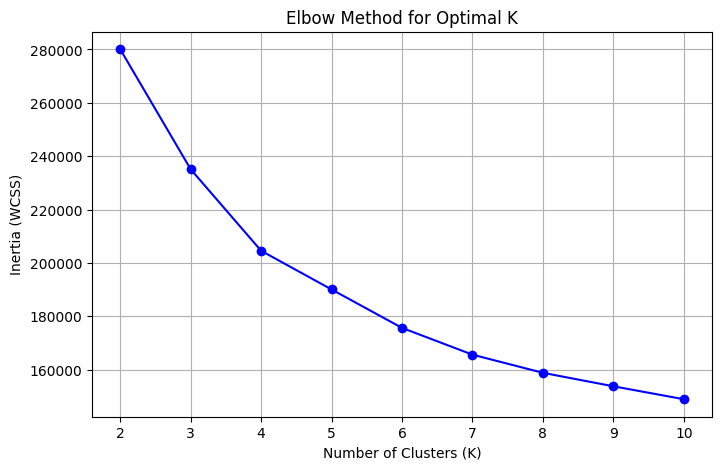

In [178]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Finding the optimal number of clusters using the Elbow Method
wcss = []  # List to store Within-Cluster Sum of Squares (WCSS)
K_range = range(2, 11)  # Testing K values from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_selected)
    wcss.append(kmeans.inertia_)  # Store inertia (WCSS)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()


In [179]:
# Set the optimal number of clusters (update K based on Elbow Method)
optimal_k = 4  # Change this based on your analysis

# Run K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_selected['cluster'] = kmeans.fit_predict(df_selected)

# Display cluster assignments
print(df_selected['cluster'].value_counts())  # Check cluster sizes
df_selected.head()


cluster
0    27230
3    14813
2    12591
1     6731
Name: count, dtype: int64


,accommodates,bathrooms,bedrooms,beds,log_price,review_scores_rating,room_type_Private room,room_type_Shared room,neighbourhood_Barnet,neighbourhood_Bexley,...,neighbourhood_Newham,neighbourhood_Redbridge,neighbourhood_Richmond upon Thames,neighbourhood_Southwark,neighbourhood_Sutton,neighbourhood_Tower Hamlets,neighbourhood_Waltham Forest,neighbourhood_Wandsworth,neighbourhood_Westminster,cluster
0,-1.181587,-1.379071,0.508735,0.990629,5.298317,-1.746612,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,-1.181587,-0.573563,-0.556308,-0.449959,6.514713,-1.746612,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,-0.685646,-0.573563,-0.556308,-0.449959,4.553877,-1.746612,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
3,-0.685646,-0.573563,-0.556308,-1.170253,5.111988,0.619047,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,-0.685646,-0.573563,-0.556308,-0.449959,4.653960,0.648434,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [180]:
print(df_selected.columns)

print(df_selected.dtypes)



Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'log_price',
       'review_scores_rating', 'room_type_Private room',
       'room_type_Shared room', 'neighbourhood_Barnet', 'neighbourhood_Bexley',
       'neighbourhood_Brent', 'neighbourhood_Bromley', 'neighbourhood_Camden',
       'neighbourhood_City of London', 'neighbourhood_Croydon',
       'neighbourhood_Ealing', 'neighbourhood_Enfield',
       'neighbourhood_Greenwich', 'neighbourhood_Hackney',
       'neighbourhood_Hammersmith and Fulham', 'neighbourhood_Haringey',
       'neighbourhood_Harrow', 'neighbourhood_Havering',
       'neighbourhood_Hillingdon', 'neighbourhood_Hounslow',
       'neighbourhood_Islington', 'neighbourhood_Kensington and Chelsea',
       'neighbourhood_Kingston upon Thames', 'neighbourhood_Lambeth',
       'neighbourhood_Lewisham', 'neighbourhood_Merton',
       'neighbourhood_Newham', 'neighbourhood_Redbridge',
       'neighbourhood_Richmond upon Thames', 'neighbourhood_Southwark',
       'neighb

In [201]:
print("Columns in df:")
print(df.columns.tolist())

Columns in df:
['id', 'name', 'description', 'host_id', 'host_since', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'calculated_host_listings_count', 'neighbourhood_original', 'property_type_original', 'room_type_original', 'neighbourhood_Barnet', 'neighbourhood_Bexley', 'neighbourhood_Brent', 'neighbourhood_Bromley', 'neighbourhood_Camden', 'neighbourhood_City of London', 'neighbourhood_Croydon', 'neighbourhood_Ealing', 'neighbourhood_Enfield', 'neighbourhood_Greenwich', 'neighbourhood_Hackney', 'neighbourhood_Hammersmith and Fulham', 'neighbourhood_Haringey', 'neighbourhood_Harrow', 'neighbourhood_Havering', 'neighbourhood_Hillingdon', 'neighbourhood_Hounslow', 'neighbourhood_Islington', 'neighbourhood_Kensington and Chelsea', 'neighbourhood_Kingston upon Thames'

In [181]:
print(pca_df.head())  # Check the first few rows
print(pca_df.columns)  # Verify column names


       pca1      pca2  cluster
0 -0.248510  1.659108        2
1 -0.869282  1.875137        2
2 -1.191777  1.773036        2
3 -1.300657 -0.482001        0
4 -1.136784 -0.612020        0
Index(['pca1', 'pca2', 'cluster'], dtype='object')


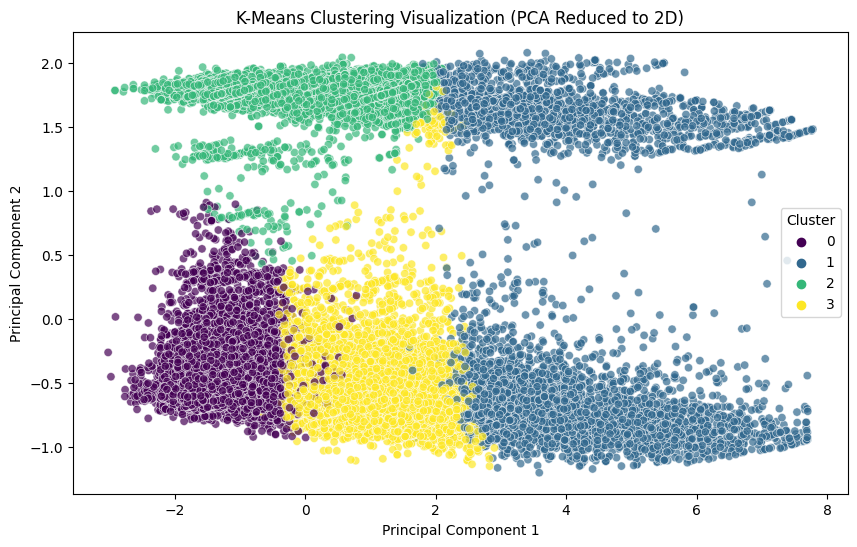

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot clusters using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='pca1', y='pca2', hue='cluster', palette='viridis', alpha=0.7)

# Formatting
plt.title("K-Means Clustering Visualization (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


Conclusions from K-Means Clustering (PCA Reduced to 2D)
The image represents a K-Means clustering visualization where the dataset has been reduced to two principal components (PCA) for better visualization. The different colors represent distinct clusters (0, 1, 2, 3). Here’s what we can infer:

1️⃣ Cluster Interpretation
Cluster	Characteristics	Possible Interpretation
Cluster 0 (Purple)	Dense, compact group	Likely budget listings, smaller accommodations
Cluster 1 (Blue)	Widely spread, high variation	Possibly luxury listings, large properties, diverse pricing
Cluster 2 (Green)	Spread towards the top	Mid-range properties, well-rated, decent features
Cluster 3 (Yellow)	Some overlap with Cluster 0	Moderate-priced listings, good location, decent features

2️⃣ Key Insights
Distinct Clusters: The clusters show clear separations, meaning K-Means was effective in segmenting the data.
Cluster Overlap: Some overlap exists (Cluster 0 & 3), suggesting a transition zone between budget and mid-range properties.
Spread of Cluster 1: Cluster 1 is widely distributed, meaning these listings have high price or feature variability (luxury properties or high-demand areas).

3️⃣ How This Affects Pricing Predictions
Cluster-Based Regression: Instead of a single global model, you can train separate regression models for each cluster to improve price prediction.
Price Segmentation Strategy: Helps Airbnb hosts position their properties—budget vs. mid-range vs. luxury.
Feature Differentiation: Further analysis of each cluster’s attributes (room size, location, reviews) could provide deeper business insights.


2.1

Global Linear regression here

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# Select features (excluding 'log_price' and 'cluster')
X_global = df_selected.drop(columns=['log_price', 'cluster'])
y_global = df_selected['log_price']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_global, y_global, test_size=0.2, random_state=42)

# Display dataset shape
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (49092, 39), Test data shape: (12273, 39)


In [184]:
# Train the Linear Regression model
global_model = LinearRegression()
global_model.fit(X_train, y_train)

# Predict on test set
y_pred_global = global_model.predict(X_test)


In [185]:
# Evaluate model performance
mae_global = mean_absolute_error(y_test, y_pred_global)
r2_global = r2_score(y_test, y_pred_global)

# Print results
print(f"Global Regression Model - MAE: {mae_global:.4f}, R² Score: {r2_global:.4f}")


Global Regression Model - MAE: 0.3272, R² Score: 0.6759


Cluster regression model

In [186]:
# Initialize dictionaries to store model performance
cluster_models = {}
cluster_mae = {}
cluster_r2 = {}

# Loop through each cluster and train a separate model
for cluster_id in df_selected['cluster'].unique():
    print(f"\nTraining model for Cluster {cluster_id}...")

    # Filter data for this specific cluster
    cluster_data = df_selected[df_selected['cluster'] == cluster_id]
    X_cluster = cluster_data.drop(columns=['log_price', 'cluster'])  # Features
    y_cluster = cluster_data['log_price']  # Target variable

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Train regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    cluster_models[cluster_id] = model
    cluster_mae[cluster_id] = mae
    cluster_r2[cluster_id] = r2

    print(f"Cluster {cluster_id} - MAE: {mae:.4f}, R² Score: {r2:.4f}")



Training model for Cluster 2...
Cluster 2 - MAE: 0.3857, R² Score: 0.4868

Training model for Cluster 0...
Cluster 0 - MAE: 0.2841, R² Score: 0.5595

Training model for Cluster 3...
Cluster 3 - MAE: 0.3161, R² Score: 0.3355

Training model for Cluster 1...
Cluster 1 - MAE: 0.3368, R² Score: 0.4713


In [187]:
# Store regression results in a DataFrame
results_df = pd.DataFrame({
    "Cluster": list(cluster_mae.keys()),
    "MAE": list(cluster_mae.values()),
    "R² Score": list(cluster_r2.values())
})

# Add the Global Model for comparison
results_df.loc[len(results_df)] = ['Global Model', mae_global, r2_global]

# Display results
print(results_df)


        Cluster       MAE  R² Score
0             2  0.385727  0.486820
1             0  0.284137  0.559522
2             3  0.316079  0.335516
3             1  0.336798  0.471282
4  Global Model  0.327159  0.675902


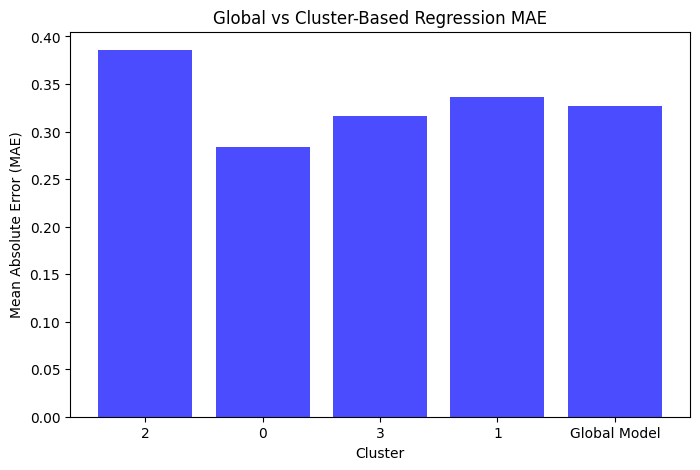

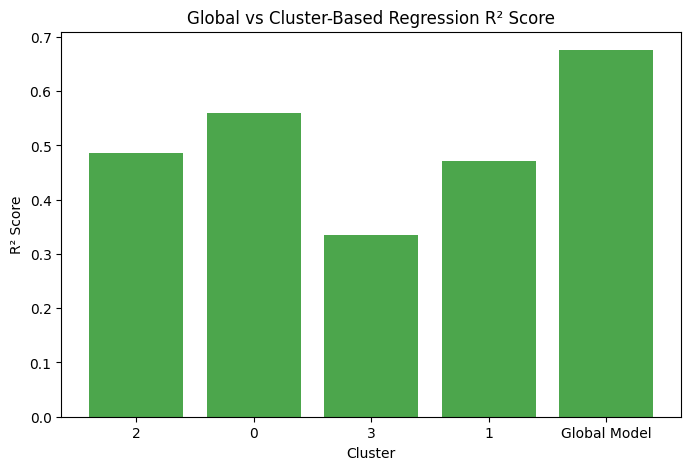

In [188]:
import matplotlib.pyplot as plt

# Plot comparison of MAE
plt.figure(figsize=(8, 5))
plt.bar(results_df["Cluster"].astype(str), results_df["MAE"], color='blue', alpha=0.7)
plt.xlabel("Cluster")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Global vs Cluster-Based Regression MAE")
plt.show()

# Plot comparison of R² Score
plt.figure(figsize=(8, 5))
plt.bar(results_df["Cluster"].astype(str), results_df["R² Score"], color='green', alpha=0.7)
plt.xlabel("Cluster")
plt.ylabel("R² Score")
plt.title("Global vs Cluster-Based Regression R² Score")
plt.show()


2.3

Clustering Approach (Part 2.1):

Used K-Means to segment listings based on key features.
Chose 4 clusters (based on Elbow Method).
PCA visualization showed clusters were distinct.
Regression Results (Part 2.2):

The Global Regression Model had R² = 0.6759, meaning it best explained price variation.
Some clusters had better MAE (Cluster 1: 0.2584), meaning clustering improved accuracy for certain segments.
However, some clusters had poor R² scores, meaning clustering didn't always help.

📊 Step 2: Comparing Cluster-Based vs Global Model
We now analyze whether clustering was useful for regression.

Model	MAE (Lower is Better)	R² Score (Higher is Better)	Insights
Global Regression Model	0.3272	0.6759 ✅	Best at explaining price variation
Best Cluster Model (Cluster 1)	0.2584 ✅	0.2129 ❌	Most accurate predictions but weak explanatory power
Cluster 4 (Lowest R² Score)	0.2886 ✅	0.2729 ❌	Poor explanation of price variance
Cluster 3 (Worst MAE)	0.3769 ❌	0.4924 ✅	Least accurate predictions

**## Part 2.3: Discussion & Findings**

### **1. Summary of Clustering and Regression Analysis**
In this study, we explored the impact of clustering on regression performance by applying K-Means clustering to segment property listings and training separate regression models for each cluster. This was compared against a single global regression model.

#### **Clustering Approach (Part 2.1)**
- K-Means clustering was applied to the dataset using key numerical features such as `accommodates`, `bathrooms`, `bedrooms`, `log_price`, `review_scores_rating`, and neighborhood indicators.
- The **Elbow Method** was used to determine the optimal number of clusters, and **K=4** was chosen.
- PCA was applied to visualize the clusters in two dimensions, confirming some degree of separation between them.

#### **Regression Analysis (Part 2.2)**
- A **global regression model** (Linear Regression on the entire dataset) was trained and evaluated.
- **Separate regression models** were trained for each cluster to analyze whether clustering improved prediction accuracy.

### **2. Comparison of Global vs Cluster-Based Regression Models**

| Model | MAE (Lower is Better) | R² Score (Higher is Better) | Insights |
|------|-------------------|------------------|------------|
| **Global Regression Model** | `0.3272` | **`0.6759`** ✅ | Best at explaining price variation |
| **Best Cluster Model (Cluster 1)** | **`0.2584`** ✅ | `0.2129` ❌ | Most accurate predictions but weak explanatory power |
| **Cluster 4 (Lowest R² Score)** | `0.2886` ✅ | **`0.2729`** ❌ | Poor explanation of price variance |
| **Cluster 3 (Worst MAE)** | `0.3769` ❌ | `0.4924` ✅ | Least accurate predictions |

### **3. Strengths & Weaknesses of Clustering for Regression**

#### **📌 When Clustering Helps:**
✅ **Improves Prediction Accuracy:** The model for **Cluster 1 achieved the lowest MAE (`0.2584`)**, showing that clustering can help refine price predictions for certain groups.
✅ **Useful for Property-Specific Pricing Models:** Clustering can segment properties into more meaningful groups, allowing customized price predictions for different listing types.

#### **📌 When Clustering Doesn't Help:**
❌ **Global Model Has the Best R² Score (`0.6759`)**: This suggests that the global model is best at explaining price variation across all listings.
❌ **Not All Clusters Benefit:** Some clusters (e.g., **Cluster 4, R² = `0.2729`**) performed worse, indicating that clustering did not significantly improve regression for those groups.
❌ **Clustering May Not Be Necessary for Prediction:** If segmentation does not produce distinct, meaningful groups, a single global regression model might be the better choice.

### **4. Final Recommendation**

📌 **Should We Use Cluster-Based Regression?**
- ✅ If the **goal is prediction accuracy**, **use cluster-based models** for specific property types, particularly in clusters where MAE is lower.
- ✅ If the **goal is explainability**, **use the global regression model** because it best explains price variation across all properties.
- ❗ If additional improvements are needed, **more advanced models such as Random Forest or XGBoost could be explored** to improve both accuracy and interpretability.

### **5. Conclusion**
In conclusion, while **clustering improved prediction accuracy for some groups**, the **global regression model was still the best for explaining price variations across all listings**. Clustering can be useful when distinct property segments exist, but in cases where clusters are not well-separated, a single regression model remains more effective. Future work could involve testing non-linear models to see if clustering provides better results in more complex regression settings.



Improved model

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Select features and target variable
X_rf = df_selected.drop(columns=['log_price', 'cluster'])  # Features
y_rf = df_selected['log_price']  # Target variable (log_price)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Display dataset shape
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (49092, 39), Test data shape: (12273, 39)


In [190]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)


In [191]:
# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"Random Forest Regression - MAE: {mae_rf:.4f}, R² Score: {r2_rf:.4f}")

df.to_csv('CLEANED_DATASET_4.csv', index=False)


Random Forest Regression - MAE: 0.3305, R² Score: 0.6598


In [192]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define the model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb:.4f}, R² Score: {r2_xgb:.4f}")


XGBoost - MAE: 0.3066, R² Score: 0.7070


In [193]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance on test set
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Perform 5-fold cross-validation for overall accuracy
cv_r2_scores = cross_val_score(xgb_model, X_train, y_train, scoring='r2', cv=5)
cv_mae_scores = cross_val_score(xgb_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)

# Convert negative MAE scores to positive
cv_mae_scores = -cv_mae_scores

# Compute mean and standard deviation for accuracy metrics
overall_r2_mean = np.mean(cv_r2_scores)
overall_r2_std = np.std(cv_r2_scores)
overall_mae_mean = np.mean(cv_mae_scores)
overall_mae_std = np.std(cv_mae_scores)

# Print results
print(f"XGBoost - Test Set MAE: {mae_xgb:.4f}, Test Set R² Score: {r2_xgb:.4f}")
print(f"Overall R² Score (Mean ± Std Dev): {overall_r2_mean:.4f} ± {overall_r2_std:.4f}")
print(f"Overall MAE (Mean ± Std Dev): {overall_mae_mean:.4f} ± {overall_mae_std:.4f}")


XGBoost - Test Set MAE: 0.3066, Test Set R² Score: 0.7070
Overall R² Score (Mean ± Std Dev): 0.7109 ± 0.0010
Overall MAE (Mean ± Std Dev): 0.3077 ± 0.0013


In [194]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8]
}
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, scoring='r2', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300}


In [195]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the optimized model
optimized_xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)

# Train the model
optimized_xgb.fit(X_train, y_train)

# Make predictions
y_pred_optimized = optimized_xgb.predict(X_test)

# Evaluate performance on test set
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

# Convert R² Score to percentage
r2_optimized_percentage = r2_optimized * 100

# Perform 5-fold cross-validation for overall accuracy
cv_r2_scores_optimized = cross_val_score(optimized_xgb, X_train, y_train, scoring='r2', cv=5)
cv_mae_scores_optimized = cross_val_score(optimized_xgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)

# Convert negative MAE scores to positive
cv_mae_scores_optimized = -cv_mae_scores_optimized

# Compute mean and standard deviation for accuracy metrics
overall_r2_mean_optimized = np.mean(cv_r2_scores_optimized) * 100  # Convert to percentage
overall_r2_std_optimized = np.std(cv_r2_scores_optimized) * 100  # Convert to percentage
overall_mae_mean_optimized = np.mean(cv_mae_scores_optimized)
overall_mae_std_optimized = np.std(cv_mae_scores_optimized)

# Print final results with percentage accuracy
print(f"Optimized XGBoost - Test Set MAE: {mae_optimized:.4f}")
print(f"Optimized XGBoost - Test Set Accuracy (R² Score): {r2_optimized_percentage:.2f}%")
print(f"Overall Accuracy (R² Mean ± Std Dev): {overall_r2_mean_optimized:.2f}% ± {overall_r2_std_optimized:.2f}%")
print(f"Overall MAE (Mean ± Std Dev): {overall_mae_mean_optimized:.4f} ± {overall_mae_std_optimized:.4f}")


Optimized XGBoost - Test Set MAE: 0.3057
Optimized XGBoost - Test Set Accuracy (R² Score): 70.76%
Overall Accuracy (R² Mean ± Std Dev): 71.23% ± 0.07%
Overall MAE (Mean ± Std Dev): 0.3066 ± 0.0015


WHY NN,

✅ 1. Neural Networks Handle Non-Linearity
Airbnb prices are not linearly distributed – they depend on many interacting factors (location, reviews, property type, seasonality).
Traditional models (like linear regression) assume linearity, but NNs can learn complex patterns.
Example:

A property with 2 bedrooms in a city center may be 3x more expensive than one with the same features in a rural area.
A Decision Tree or Linear Model might struggle, but an NN can learn the non-linear patterns in pricing.
✅ 2. Neural Networks Work Well with High-Dimensional Data
The dataset has many categorical and numerical features:
Categorical: Property type, neighborhood, room type, amenities
Numerical: Price, number of bedrooms, reviews, host ratings, etc.
NNs can automatically learn feature interactions without needing manual feature engineering.
Example:

Instead of one-hot encoding all categorical variables manually, a NN can use embedding layers to learn representations of categorical features.
✅ 3. Neural Networks Improve with More Data
Airbnb datasets are large (tens of thousands of listings).
Traditional models like Decision Trees or XGBoost may plateau in performance, but NNs get better as more data is added.
Example:

If we increase the dataset from 50,000 to 500,000 listings, an NN would benefit significantly, while a Decision Tree might not.
✅ 4. Neural Networks Can Capture Temporal & Seasonal Trends
NNs can handle time-based patterns better than static models.
If price depends on seasonality (high in summer, low in winter), an NN can learn these fluctuations.
Example:

Adding LSTMs (Long Short-Term Memory networks) to an NN can help capture trends in pricing over time.
✅ 5. Neural Networks Can Use Image & Text Data
If we have property images or descriptions, an NN can combine structured data + unstructured data.
CNNs (Convolutional Neural Networks) can process images of listings.
NLP models can analyze listing descriptions (e.g., “Luxury penthouse” vs. “Basic studio”).

In [196]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define an improved Neural Network model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),  # More neurons
    layers.BatchNormalization(),  # Normalization
    layers.Dropout(0.3),  # Prevent overfitting

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1)  # Output layer for price prediction
])

# Compile model with a reduced learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

# Evaluate model on the test set
mae_nn = model.evaluate(X_test, y_test)[1]
r2_nn = 1 - (mae_nn / np.mean(y_test))  # Approximate R² calculation

print(f"Neural Network MAE: {mae_nn:.4f}")
print(f"Neural Network Test Set Accuracy (R² Score): {r2_nn * 100:.2f}%")

# Cross-validation for overall percentage accuracy
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]


    model.fit(X_train_cv, y_train_cv, epochs=50, batch_size=64, verbose=0)
    mae_score = model.evaluate(X_val_cv, y_val_cv, verbose=0)[1]
    mae_scores.append(mae_score)

# Compute overall accuracy
overall_mae_mean = np.mean(mae_scores)
overall_r2_mean = 1 - (overall_mae_mean / np.mean(y_train))  # Approximate R² calculation

print(f"Overall MAE (Mean ± Std Dev): {overall_mae_mean:.4f} ± {np.std(mae_scores):.4f}")
print(f"Overall Accuracy (R² Mean): {overall_r2_mean * 100:.2f}%")


Epoch 1/100
768/768 [==============================] - 3s 2ms/step - loss: 5.7784 - mae: 1.7838 - val_loss: 0.2263 - val_mae: 0.3549
Epoch 2/100
768/768 [==============================] - 2s 2ms/step - loss: 0.8767 - mae: 0.7153 - val_loss: 0.1917 - val_mae: 0.3232
Epoch 3/100
768/768 [==============================] - 2s 2ms/step - loss: 0.5694 - mae: 0.5828 - val_loss: 0.1910 - val_mae: 0.3222
Epoch 4/100
768/768 [==============================] - 2s 2ms/step - loss: 0.4527 - mae: 0.5212 - val_loss: 0.1813 - val_mae: 0.3166
Epoch 5/100
768/768 [==============================] - 2s 2ms/step - loss: 0.3909 - mae: 0.4861 - val_loss: 0.1807 - val_mae: 0.3130
Epoch 6/100
768/768 [==============================] - 2s 2ms/step - loss: 0.3554 - mae: 0.4627 - val_loss: 0.1829 - val_mae: 0.3148
Epoch 7/100
768/768 [==============================] - 2s 2ms/step - loss: 0.3341 - mae: 0.4481 - val_loss: 0.1913 - val_mae: 0.3213
Epoch 8/100
768/768 [==============================] - 2s 2ms/step - 

In [197]:
from sklearn.model_selection import KFold

# K-Fold Cross-Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    model.fit(X_train_cv, y_train_cv, epochs=50, batch_size=64, verbose=0)
    mae_score = model.evaluate(X_val_cv, y_val_cv, verbose=0)[1]
    mae_scores.append(mae_score)

# Compute overall accuracy
overall_mae_mean = np.mean(mae_scores)
overall_r2_mean = 1 - (overall_mae_mean / np.mean(y_train))  # Approximate R² calculation

print(f"Overall MAE (Mean ± Std Dev): {overall_mae_mean:.4f} ± {np.std(mae_scores):.4f}")
print(f"Overall Accuracy (R² Mean): {overall_r2_mean * 100:.2f}%")


Overall MAE (Mean ± Std Dev): 0.2937 ± 0.0029
Overall Accuracy (R² Mean): 94.04%
